In [11]:
import pandas as pd
data = pd.read_csv('foreign_tourist.csv')

In [12]:
data_info = data.info()
data_description = data.describe()
data_head = data.head()

data_info, data_description, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Năm                                                1895 non-null   int64  
 1   Tháng                                              1895 non-null   object 
 2   Chỉ tiêu                                           1895 non-null   object 
 3   Ước tính mỗi tháng                                 1856 non-null   object 
 4   Tổng lượt khách cả năm                             1892 non-null   object 
 5   So với tháng trước (%)                             1852 non-null   object 
 6   So sánh tháng này ở năm trước(%)                   1424 non-null   object 
 7   So sánh tổng lượt khách với cùng kỳ năm trước (%)  1278 non-null   object 
 8   Unnamed: 8                                         0 non-null      float64
 9   Unnamed:

(None,
                Năm  Unnamed: 8  Unnamed: 9
 count  1895.000000         0.0         0.0
 mean   2021.813720         NaN         NaN
 std       1.870581         NaN         NaN
 min    2019.000000         NaN         NaN
 25%    2020.000000         NaN         NaN
 50%    2022.000000         NaN         NaN
 75%    2023.000000         NaN         NaN
 max    2024.000000         NaN         NaN,
     Năm Tháng        Chỉ tiêu Ước tính mỗi tháng Tổng lượt khách cả năm  \
 0  2019    t1  1. Đường không          1.087.755              1.167.203   
 1  2019    t1   2. Đường biển             10.931                 24.157   
 2  2019    t1     3. Đường bộ            275.549                310.406   
 3  2019    t1        Thái Lan             42.603                 45.105   
 4  2019    t1        Đài Loan             64.365                 63.789   
 
   So với tháng trước (%) So sánh tháng này ở năm trước(%)  \
 0                  107,3                            101,4   
 1            

In [13]:
# Xóa các cột không cần thiết
data_cleaned = data.drop(columns=['Unnamed: 8', 'Unnamed: 9'])

data_full = data_cleaned.copy()

data_full_count = data_full['Năm'].value_counts().sort_index()

data_full_count

Năm
2019    456
2020    122
2021     12
2022    443
2023    453
2024    409
Name: count, dtype: int64

In [14]:
data_no_covid_filtered = data_cleaned[~(
    ((data_cleaned['Năm'] == 2020) & (data_cleaned['Tháng'].isin(['t4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12']))) |
    ((data_cleaned['Năm'] == 2021))
)]

# Kiểm tra số lượng dòng dữ liệu sau khi lọc
filtered_count = data_no_covid_filtered['Năm'].value_counts().sort_index()

filtered_count

Năm
2019    456
2020    113
2022    443
2023    453
2024    409
Name: count, dtype: int64

In [16]:
columns_to_convert = ['Ước tính mỗi tháng', 'Tổng lượt khách cả năm', 
                      'So với tháng trước (%)', 'So sánh tháng này ở năm trước(%)', 
                      'So sánh tổng lượt khách với cùng kỳ năm trước (%)']
for col in columns_to_convert:
    data_no_covid_filtered[col] = (data_no_covid_filtered[col]
                                   .str.replace('.', '', regex=False)  # Xóa dấu chấm (nghìn)
                                   .str.replace(',', '.', regex=False)  # Thay dấu phẩy thành dấu chấm (thập phân)
                                   .astype(float))

# Kiểm tra lại kiểu dữ liệu sau khi chuyển đổi
data_no_covid_filtered.dtypes

C:\Users\Admin\AppData\Local\Temp\ipykernel_4992\1705999005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_covid_filtered[col] = (data_no_covid_filtered[col]
C:\Users\Admin\AppData\Local\Temp\ipykernel_4992\1705999005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_covid_filtered[col] = (data_no_covid_filtered[col]
C:\Users\Admin\AppData\Local\Temp\ipykernel_4992\1705999005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

Năm                                                    int64
Tháng                                                 object
Chỉ tiêu                                              object
Ước tính mỗi tháng                                   float64
Tổng lượt khách cả năm                               float64
So với tháng trước (%)                               float64
So sánh tháng này ở năm trước(%)                     float64
So sánh tổng lượt khách với cùng kỳ năm trước (%)    float64
dtype: object

In [17]:
import numpy as np

# 1. Kiểm tra missing values
missing_values = data_no_covid_filtered.isnull().sum()

# 2. Xử lý outliers bằng IQR
Q1 = data_no_covid_filtered[columns_to_convert].quantile(0.25)
Q3 = data_no_covid_filtered[columns_to_convert].quantile(0.75)
IQR = Q3 - Q1

# Xác định outliers
outliers = ((data_no_covid_filtered[columns_to_convert] < (Q1 - 1.5 * IQR)) |
            (data_no_covid_filtered[columns_to_convert] > (Q3 + 1.5 * IQR))).sum()

missing_values, outliers

(Năm                                                    0
 Tháng                                                  0
 Chỉ tiêu                                               0
 Ước tính mỗi tháng                                    39
 Tổng lượt khách cả năm                                 3
 So với tháng trước (%)                                43
 So sánh tháng này ở năm trước(%)                     471
 So sánh tổng lượt khách với cùng kỳ năm trước (%)    617
 dtype: int64,
 Ước tính mỗi tháng                                   187
 Tổng lượt khách cả năm                               220
 So với tháng trước (%)                               120
 So sánh tháng này ở năm trước(%)                     217
 So sánh tổng lượt khách với cùng kỳ năm trước (%)    178
 dtype: int64)

In [18]:
# Kiểm tra missing values
data_no_covid_filtered.isnull().sum()
# Điền giá trị missing bằng median
for col in data_no_covid_filtered.columns:
    if data_no_covid_filtered[col].isnull().sum() > 0:
        data_no_covid_filtered[col].fillna(data_no_covid_filtered[col].median(), inplace=True)
data_no_covid_filtered.isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4992\837465490.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_no_covid_filtered[col].fillna(data_no_covid_filtered[col].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_4992\837465490.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_covid_filtered[col].fillna(d

Năm                                                  0
Tháng                                                0
Chỉ tiêu                                             0
Ước tính mỗi tháng                                   0
Tổng lượt khách cả năm                               0
So với tháng trước (%)                               0
So sánh tháng này ở năm trước(%)                     0
So sánh tổng lượt khách với cùng kỳ năm trước (%)    0
dtype: int64

In [19]:
from scipy import stats
#Winsorization outlier
for col in columns_to_convert:
    data_no_covid_filtered[col] = stats.mstats.winsorize(data_no_covid_filtered[col], limits=[0.05, 0.05])

# Kiểm tra lại phân bố sau khi Winsorization
data_no_covid_filtered[columns_to_convert].describe()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4992\2480469071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_covid_filtered[col] = stats.mstats.winsorize(data_no_covid_filtered[col], limits=[0.05, 0.05])


,Ước tính mỗi tháng,Tổng lượt khách cả năm,So với tháng trước (%),So sánh tháng này ở năm trước(%),So sánh tổng lượt khách với cùng kỳ năm trước (%)
count,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000
mean,38423.012273,1.902510e+05,113.487247,266.926147,276.688367
std,74225.463473,3.489062e+05,39.007825,443.603293,369.318187
min,137.000000,3.530000e+02,56.800000,79.500000,94.900000
25%,3139.000000,1.301675e+04,87.300000,111.300000,117.800000
50%,11010.000000,4.837600e+04,107.100000,125.500000,133.400000
75%,33223.250000,1.756082e+05,130.400000,155.400000,180.475000
max,306107.000000,1.443633e+06,218.900000,1987.700000,1567.900000


In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_encoded = data_no_covid_filtered.copy()
data_encoded['Chỉ tiêu'] = label_encoder.fit_transform(data_encoded['Chỉ tiêu'])

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Kiểm tra đa cộng tuyến (VIF)
X = data_encoded[['Ước tính mỗi tháng', 'Tổng lượt khách cả năm', 
                  'So với tháng trước (%)', 'So sánh tháng này ở năm trước(%)']]
X = X.dropna()
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,Variable,VIF
0,Ước tính mỗi tháng,8.599474
1,Tổng lượt khách cả năm,8.618343
2,So với tháng trước (%),1.518473
3,So sánh tháng này ở năm trước(%),1.347999


In [22]:
#Phân bố dữ liệu (skewness và kurtosis)
distribution = data_no_covid_filtered[columns_to_convert].describe()
skewness = data_no_covid_filtered[columns_to_convert].skew()
kurtosis = data_no_covid_filtered[columns_to_convert].kurt()
skewness,kurtosis

(Ước tính mỗi tháng                                   2.873922
 Tổng lượt khách cả năm                               2.698978
 So với tháng trước (%)                               1.037917
 So sánh tháng này ở năm trước(%)                     3.298048
 So sánh tổng lượt khách với cùng kỳ năm trước (%)    2.702700
 dtype: float64,
 Ước tính mỗi tháng                                   7.212355
 Tổng lượt khách cả năm                               6.510722
 So với tháng trước (%)                               0.935872
 So sánh tháng này ở năm trước(%)                     9.546013
 So sánh tổng lượt khách với cùng kỳ năm trước (%)    6.172548
 dtype: float64)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Tạo biến đầu vào và đầu ra
X = data_no_covid_filtered[['Ước tính mỗi tháng', 'Tổng lượt khách cả năm', 
                            'So với tháng trước (%)', 'So sánh tháng này ở năm trước(%)']]
y = data_no_covid_filtered['So sánh tổng lượt khách với cùng kỳ năm trước (%)']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 1. Huấn luyện mô hình Linear Regression (loại bỏ 'Tổng lượt khách cả năm')
X_train_lr = X_train.drop(columns=['Tổng lượt khách cả năm'])
X_test_lr = X_test.drop(columns=['Tổng lượt khách cả năm'])

lr = LinearRegression()
lr.fit(X_train_lr, y_train)
y_pred_lr = lr.predict(X_test_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"R2 Score: {r2_lr}")
print(f"MSE: {mse_lr}")

R2 Score: 0.5080657215207446
MSE: 56598.8331068023


In [24]:
data_no_covid_filtered['So sánh tháng này ở năm trước(%)'] = np.sqrt(data_no_covid_filtered['So sánh tháng này ở năm trước(%)'])
data_no_covid_filtered['Ước tính mỗi tháng'] = np.sqrt(data_no_covid_filtered['Ước tính mỗi tháng'])
data_no_covid_filtered['Tổng lượt khách cả năm'] = np.sqrt(data_no_covid_filtered['Tổng lượt khách cả năm'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_4992\3372116826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_covid_filtered['So sánh tháng này ở năm trước(%)'] = np.sqrt(data_no_covid_filtered['So sánh tháng này ở năm trước(%)'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_4992\3372116826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_covid_filtered['Ước tính mỗi tháng'] = np.sqrt(data_no_covid_filtered['Ước tính mỗi tháng'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_4992\337211682

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("R^2 Score (Random Forest):", r2_score(y_test, y_pred_rf))

R^2 Score (Random Forest): 0.7055841783868104


In [26]:
X_train_rf = X_train.drop(columns=['Ước tính mỗi tháng', 'Tổng lượt khách cả năm'])
X_test_rf = X_test.drop(columns=['Ước tính mỗi tháng', 'Tổng lượt khách cả năm'])

rf.fit(X_train_rf, y_train)
y_pred_rf = rf.predict(X_test_rf)

print("R^2 Score (Random Forest - Sau khi loại bỏ):", r2_score(y_test, y_pred_rf))


R^2 Score (Random Forest - Sau khi loại bỏ): 0.6471670803166811


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.model_selection import GridSearchCV

# Thiết lập lưới tham số để tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,  # Cross-validation 5-fold
                           scoring='r2',
                           n_jobs=-1,
                           verbose=2)

# Huấn luyện với tập dữ liệu ban đầu (không loại bỏ biến)
grid_search.fit(X_train, y_train)

# Lấy tham số tốt nhất
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 5 folds for each of 16 candidates, totalling 80 fits


({'max_depth': 10,
  'max_features': 'sqrt',
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 100},
 0.7503959175451792)

In [29]:
# Khởi tạo mô hình Random Forest với tham số tốt nhất
rf_best = RandomForestRegressor(**grid_search.best_params_, random_state=42)

# Huấn luyện lại mô hình với tập dữ liệu huấn luyện
rf_best.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_rf_best = rf_best.predict(X_test)
print("R^2 Score (Tuned Random Forest):", r2_score(y_test, y_pred_rf_best))


R^2 Score (Tuned Random Forest): 0.7262719979769716


C:\Users\Admin\AppData\Local\Temp\ipykernel_4992\3963185598.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Thời gian'] = pd.to_datetime(data['Năm'].astype(str) + '-' + data['Tháng'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_4992\3963185598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Thời gian'] = pd.to_datetime(data['Năm'].astype(str) + '-' + data['Tháng'])


Text(0, 0.5, 'Ước tính mỗi tháng')

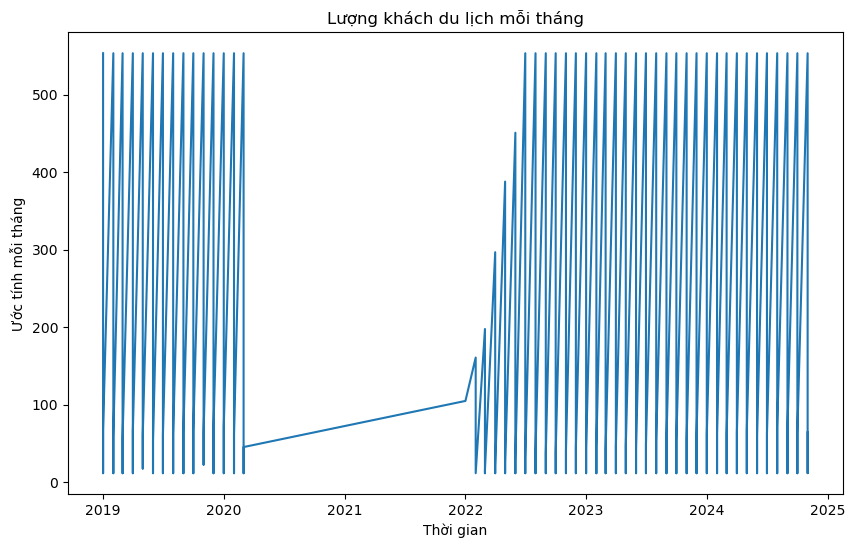

In [32]:
import matplotlib.pyplot as plt
data = data_no_covid_filtered[['Năm', 'Tháng', 'Ước tính mỗi tháng']]
data['Thời gian'] = pd.to_datetime(data['Năm'].astype(str) + '-' + data['Tháng'])
data.set_index('Thời gian', inplace=True)
data = data['Ước tính mỗi tháng']

# Vẽ biểu đồ dữ liệu
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title("Lượng khách du lịch mỗi tháng")
plt.xlabel("Thời gian")
plt.ylabel("Ước tính mỗi tháng")

In [43]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
result = adfuller(data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    print("Dữ liệu không dừng, cần thực hiện differencing.")
else:
    print("Dữ liệu dừng.")


ADF Statistic: -9.354844405832985
p-value: 8.111397902093983e-16
Dữ liệu dừng.


In [44]:
#ARIMA(4,1,5)
model_415 = ARIMA(data, order=(4, 1, 5))
result_415 = model_415.fit()

# Dự báo 12 tháng tiếp theo
forecast_415 = result_415.forecast(steps=12)

# Hiển thị tóm tắt mô hình
print("Mô hình ARIMA(4,1,5):")
print(result_415.summary())

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mô hình ARIMA(4,1,5):
                               SARIMAX Results                                
Dep. Variable:     Ước tính mỗi tháng   No. Observations:                 1874
Model:                 ARIMA(4, 1, 5)   Log Likelihood              -11672.100
Date:                Sat, 04 Jan 2025   AIC                          23364.200
Time:                        18:02:41   BIC                          23419.553
Sample:                             0   HQIC                         23384.592
                               - 1874                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3507      0.018    -75.276      0.000      -1.386      -1.316
ar.L2         -1.5930      0.025    -64.310      0.000      -1.642      -1.544
ar.L3         -1.2621      0.0

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [45]:
model_414 = ARIMA(data, order=(4,1,4))
result_414 = model_414.fit()
forecast_414 = result_414.forecast(steps=12)
print(result_414.summary())

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     Ước tính mỗi tháng   No. Observations:                 1874
Model:                 ARIMA(4, 1, 4)   Log Likelihood              -11689.922
Date:                Sat, 04 Jan 2025   AIC                          23397.844
Time:                        18:03:42   BIC                          23447.662
Sample:                             0   HQIC                         23416.197
                               - 1874                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7820      0.471     -3.783      0.000      -2.705      -0.859
ar.L2         -1.6880      0.810     -2.083      0.037      -3.276      -0.100
ar.L3         -0.8467      0.553     -1.531      0.1

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [46]:
from sklearn.metrics import mean_squared_error

# Lấy dữ liệu thực tế 12 tháng cuối để so sánh
y_true = data[-12:]

# Đánh giá MSE
mse_415 = mean_squared_error(y_true, forecast_415)
mse_414 = mean_squared_error(y_true, forecast_414)

print(f"MSE (ARIMA(4,1,5)): {mse_415}")
print(f"MSE (ARIMA(4,1,4)): {mse_414}")


MSE (ARIMA(4,1,5)): 3298.632889307755
MSE (ARIMA(4,1,4)): 3847.416237604866


In [52]:
print(forecast_415)
print(forecast_414)

1874     89.008976
1875     95.612658
1876     70.779375
1877     98.874053
1878     99.393949
1879     79.291732
1880     92.668889
1881     80.499236
1882    100.525986
1883     94.203038
1884     74.072537
1885     97.091301
Name: predicted_mean, dtype: float64
1874    105.903465
1875     71.725458
1876    100.350328
1877     77.265462
1878     91.196772
1879     87.544473
1880     84.687065
1881     88.499482
1882     86.995940
1883     86.347389
1884     87.351768
1885     87.211251
Name: predicted_mean, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_4992\3187150747.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1], periods=12, freq='M')


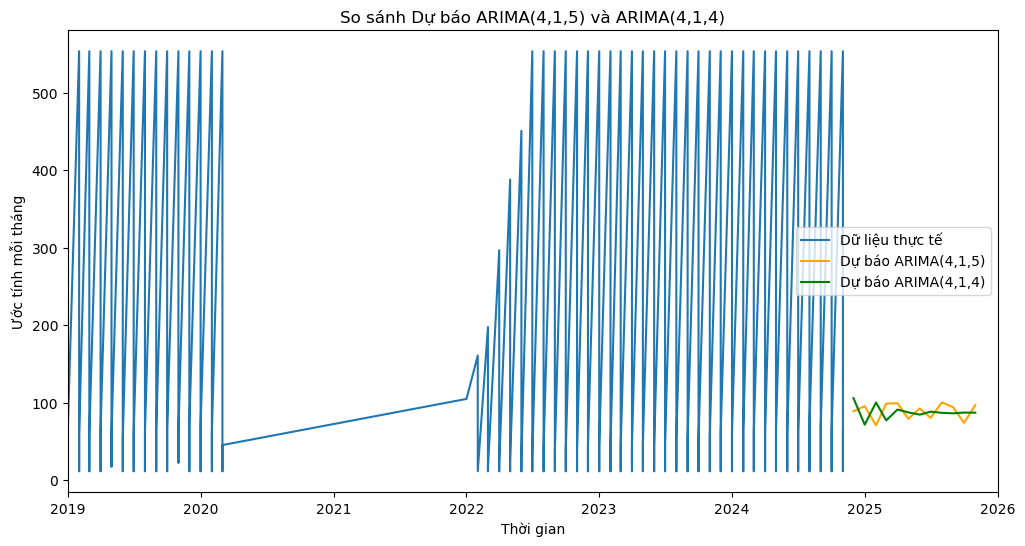

In [55]:
forecast_index = pd.date_range(start=data.index[-1], periods=12, freq='M')

forecast_415.index = forecast_index
forecast_414.index = forecast_index

plt.figure(figsize=(12, 6))
plt.plot(data, label='Dữ liệu thực tế')
plt.plot(forecast_415, label='Dự báo ARIMA(4,1,5)', color='orange')
plt.plot(forecast_414, label='Dự báo ARIMA(4,1,4)', color='green')
plt.legend()
plt.title("So sánh Dự báo ARIMA(4,1,5) và ARIMA(4,1,4)")
plt.xlabel("Thời gian")
plt.xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2026-01-01'))
plt.ylabel("Ước tính mỗi tháng")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_4992\2238274569.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1], periods=12, freq='M')


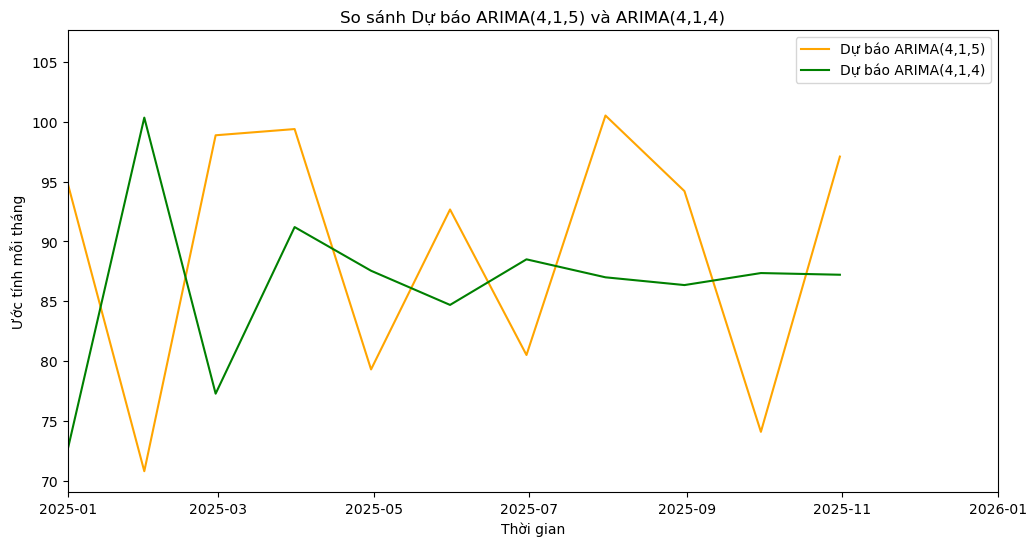

In [58]:
forecast_index = pd.date_range(start=data.index[-1], periods=12, freq='M')

forecast_415.index = forecast_index
forecast_414.index = forecast_index

plt.figure(figsize=(12, 6))
plt.plot(forecast_415, label='Dự báo ARIMA(4,1,5)', color='orange')
plt.plot(forecast_414, label='Dự báo ARIMA(4,1,4)', color='green')
plt.legend()
plt.title("So sánh Dự báo ARIMA(4,1,5) và ARIMA(4,1,4)")
plt.xlabel("Thời gian")
plt.xlim(pd.Timestamp('2025-01-01'), pd.Timestamp('2026-01-01'))
plt.ylabel("Ước tính mỗi tháng")
plt.show()
